# Project: Student's Mental Health Analysis
> Explore and analyze the students data to see how the length of stay impacts the average mental health diagnostic scores of the international students present in the study.
> - Analysis of the Relationship Between Length of Stay and Mental Health Diagnostic Averages (PHQ-9, SCS, ASISS) Among International Students
> - Exploring How Length of Stay Influences the Average Mental Health Diagnostic Scores of International Students


In [47]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

-  Load and explore data

In [75]:
df_students = pd.read_csv(r'../data/students.csv', index_col='stay')
df_students

,inter_dom,region,gender,academic,age,age_cate,stay_cate,japanese,japanese_cate,english,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
stay,,,,,,,,,,,,,,,,,,,,,
5.0,Inter,SEA,Male,Grad,24.0,4.0,Long,3.0,Average,5.0,...,Yes,Yes,No,No,No,No,No,No,No,No
1.0,Inter,SEA,Male,Grad,28.0,5.0,Short,4.0,High,4.0,...,Yes,Yes,No,No,No,No,No,No,No,No
6.0,Inter,SEA,Male,Grad,25.0,4.0,Long,4.0,High,4.0,...,No,No,No,No,No,No,No,No,No,No
1.0,Inter,EA,Female,Grad,29.0,5.0,Short,2.0,Low,3.0,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
1.0,Inter,EA,Female,Grad,28.0,5.0,Short,1.0,Low,3.0,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Null data check

In [76]:
# Check for missing values
df_students.isna().sum()

inter_dom          18
region             18
gender             18
academic           18
age                18
age_cate           18
stay_cate          18
japanese           18
japanese_cate      18
english            18
english_cate       18
intimate           26
religion           18
suicide            18
dep                16
deptype            15
todep              18
depsev             13
tosc               18
apd                18
ahome              18
aph                18
afear              18
acs                18
aguilt             18
amiscell           18
toas               18
partner            18
friends            18
parents            18
relative           18
profess            18
 phone             18
doctor             18
reli               18
alone              18
others             18
internet           44
partner_bi          3
friends_bi          3
parents_bi         14
relative_bi        14
professional_bi    14
phone_bi           14
doctor_bi          14
religion_b

- Processing of null and useless data

In [77]:
# Processing of null data
df_students = df_students.dropna(how='all')

# Processing of useless data
df_students = df_students.dropna(thresh=int(df_students.shape[1] * 0.2)) # at least 80% of data must be present
df_students


,inter_dom,region,gender,academic,age,age_cate,stay_cate,japanese,japanese_cate,english,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
stay,,,,,,,,,,,,,,,,,,,,,
5.0,Inter,SEA,Male,Grad,24.0,4.0,Long,3.0,Average,5.0,...,Yes,Yes,No,No,No,No,No,No,No,No
1.0,Inter,SEA,Male,Grad,28.0,5.0,Short,4.0,High,4.0,...,Yes,Yes,No,No,No,No,No,No,No,No
6.0,Inter,SEA,Male,Grad,25.0,4.0,Long,4.0,High,4.0,...,No,No,No,No,No,No,No,No,No,No
1.0,Inter,EA,Female,Grad,29.0,5.0,Short,2.0,Low,3.0,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
1.0,Inter,EA,Female,Grad,28.0,5.0,Short,1.0,Low,3.0,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.0,Dom,JAP,Male,Under,20.0,2.0,Medium,5.0,High,3.0,...,Yes,No,No,No,No,No,No,Yes,No,No
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223


- Create SQLite database and load data

In [ ]:
# Re-create connection to SQLite database
conn = sqlite3.connect('../data/students.db')

# Load DataFrame into a SQLite table
df_students.to_sql('students', conn, if_exists='replace', index=True)


- Data Analysis with SQL

In [ ]:
%load_ext sql

# Connect to the SQLite database
%sql sqlite:///../data/students.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
%%sql
SELECT *
FROM students

Running query in 'sqlite:///../data/students.db'

inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,None,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
Inter,SEA,Male,Grad,24.0,4.0,6.0,Long,3.0,Average,4.0,High,Yes,No,No,No,No,6.0,Mild,38.0,18.0,8.0,10.0,8.0,7.0,3.0,29.0,83.0,6.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,None,Yes,Yes,No,No,No,No,No,No,Yes,No,No
Inter,SA,Male,Grad,23.0,4.0,1.0,Short,3.0,Average,5.0,High,Yes,No,No,No,No,3.0,Min,46.0,17.0,6.0,10.0,5.0,3.0,2.0,15.0,58.0,7.0,5.0,7.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
Inter,SEA,Female,Grad,30.0,5.0,2.0,Medium,1.0,Low,1.0,Low,Yes,Yes,Yes,No,No,9.0,Mild,41.0,16.0,20.0,19.0,15.0,11.0,6.0,40.0,127.0,7.0,2.0,2.0,2.0,6.0,2.0,1.0,1.0,3.0,1.0,None,Yes,No,No,No,Yes,No,No,No,No,No,No
Inter,SEA,Female,Grad,25.0,4.0,4.0,Long,4.0,High,4.0,High,No,No,No,Yes,Other,7.0,Mild,36.0,22.0,12.0,13.0,13.0,10.0,6.0,33.0,109.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,Others,Male,Grad,31.0,5.0,2.0,Medium,1.0,Low,4.0,High,Yes,Yes,No,No,No,3.0,Min,48.0,8.0,4.0,5.0,12.0,3.0,2.0,17.0,51.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
%%sql
SELECT
  stay,
  COUNT(inter_dom) AS count_int,
  ROUND(AVG(todep), 2) AS average_phq,
  ROUND(AVG(tosc), 2) AS average_scs,
  ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom LIKE '%Inter'
GROUP BY stay
ORDER BY stay DESC

Running query in 'sqlite:///../data/students.db'

stay,count_int,average_phq,average_scs,average_as
10.0,1,13.0,32.0,50.0
8.0,1,10.0,44.0,65.0
7.0,1,4.0,48.0,45.0
6.0,3,6.0,38.0,58.67
5.0,1,0.0,34.0,91.0
4.0,14,8.57,33.93,87.71
3.0,46,9.09,37.13,78.0
2.0,39,8.28,37.08,77.67
1.0,95,7.48,38.11,72.8


- Plotting with Matplotlib

   stay  count_int  average_phq  average_scs  average_as
0  10.0          1        13.00        32.00       50.00
1   8.0          1        10.00        44.00       65.00
2   7.0          1         4.00        48.00       45.00
3   6.0          3         6.00        38.00       58.67
4   5.0          1         0.00        34.00       91.00
5   4.0         14         8.57        33.93       87.71
6   3.0         46         9.09        37.13       78.00
7   2.0         39         8.28        37.08       77.67
8   1.0         95         7.48        38.11       72.80


<Axes: title={'center': 'Average Mental Health Diagnostic Scores by Length of Stay'}, xlabel='stay'>

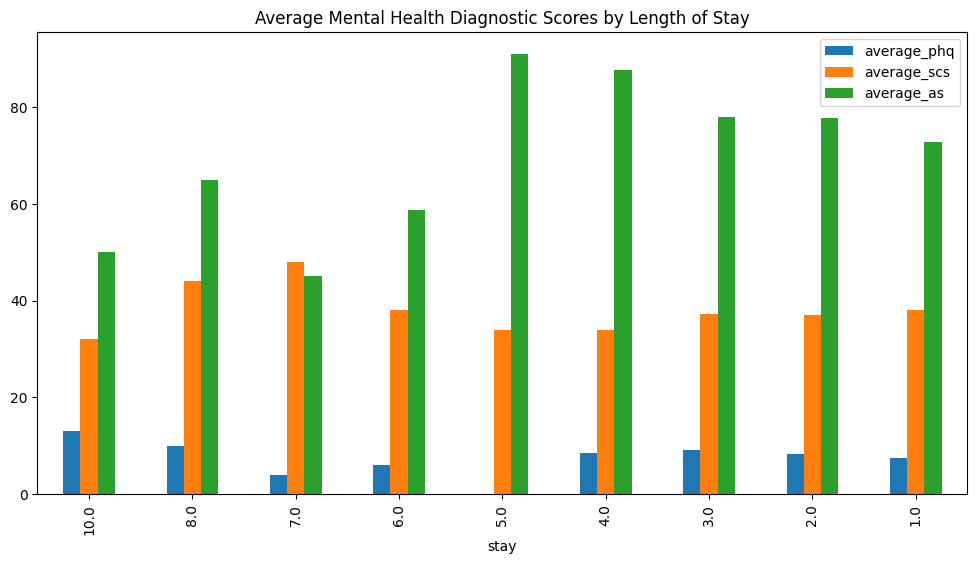

In [82]:
query = """
SELECT
  stay,
  COUNT(inter_dom) AS count_int,
  ROUND(AVG(todep), 2) AS average_phq,
  ROUND(AVG(tosc), 2) AS average_scs,
  ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom LIKE '%Inter'
GROUP BY stay
ORDER BY stay DESC
"""

df = pd.read_sql_query(query, conn)

print(df)
df.plot( x='stay',
        y=['average_phq', 'average_scs', 'average_as'],
        figsize=(12,6),
        kind='bar', 
        title='Average Mental Health Diagnostic Scores by Length of Stay',)